# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd
from seaborn import kdeplot

from scipy.stats import ttest_1samp, ttest_ind, t, sem
from statsmodels.stats.proportion import proportions_ztest

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
salaries.isnull().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [5]:
salaries["Salary or Hourly"].value_counts()

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
salaries["Department"].value_counts()[0:10] # Listing the first 10

POLICE              13414
FIRE                 4641
STREETS & SAN        2198
OEMC                 2102
WATER MGMNT          1879
AVIATION             1629
TRANSPORTN           1140
PUBLIC LIBRARY       1015
GENERAL SERVICES      980
FAMILY & SUPPORT      615
Name: Department, dtype: int64

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [7]:
# Find the hourly workers in column "Salary or Hourly"
hourly_workers = salaries["Salary or Hourly"] == "Hourly"
hrate_hworkers = salaries["Hourly Rate"][hourly_workers]

# Rate of each hourly worker
array = hrate_hworkers
popmean = 30 #$/h
ttest_1samp (array, popmean)

Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)

### Comments

**Null hypothesis**: The mean of the sample (array) is equal to the mean of the population (popmean). 

**Result**: pvalue < 0.05 --> The probability that the sample and the population have the same mean is < 0.05, so we reject the null hypothesis that both have the same mean.

**Conclusion**: Hourly wage of all hourly workers is significantly different from $30/h.

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [8]:
police = salaries["Department"] == "POLICE"
salary_workers = salaries["Salary or Hourly"] == "Salary"

# Find the salary of policemen that have a salary (some of them are hourly workers)
police_salaries = salaries["Annual Salary"][police & salary_workers]

In [9]:
array = police_salaries
popmean = 86000
ttest_1samp (array, popmean)

Ttest_1sampResult(statistic=3.081997005712994, pvalue=0.0020603403550965137)

### Comments

**Null hypothesis**: The mean of the sample (array ) is equal to the mean of the population (popmean).

**Result**: pvalue < 0.05/2 --> As the pvalue obtained from the ttest_1samp is two-sided, the limit pvalue will be 0.05/2. Our pvalue < 0.025, so we reject the null hypothesis.

**Conclusion**: 
* The mean of the salaries of this year is different from last year (pvalue < 0.025). 
* The mean of this year is greater than last year (statistic > 0).

Using the `crosstab` function, find the department that has the most hourly workers. 

In [10]:
# Cross department and salary or hourly columns
cross_df = pd.crosstab(salaries["Department"], salaries["Salary or Hourly"])
cross_df = cross_df.sort_values("Hourly", ascending = False)
cross_df[0:10] # Showing first 10

Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336
WATER MGMNT,1513,366
OEMC,1273,829
AVIATION,1082,547
GENERAL SERVICES,765,215
TRANSPORTN,725,415
PUBLIC LIBRARY,299,716
FAMILY & SUPPORT,287,328
CITY COUNCIL,64,347


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [11]:
# Department with the most hourly workers
dept_name = cross_df.index[0]
dept_name_rows = salaries["Department"] == dept_name

# Hourly Rate in this department
hourRate_dept = salaries["Hourly Rate"][dept_name_rows & hourly_workers]

In [12]:
# t-test
array = hourRate_dept
popmean = 35 #$/hour
ttest_1samp (array, popmean)

Ttest_1sampResult(statistic=-9.567447887848152, pvalue=3.3378530564707717e-21)

### Comments

**Null hypothesis**: The mean of the sample (array ) is equal to the mean of the population (popmean).

**Result**: pvalue < 0.05/2 --> As the pvalue obtained from the ttest_1samp is two-sided, the limit pvalue will be 0.05/2. Our pvalue < 0.025, so we reject the null hypothesis.

**Conclusion**:
* The mean of the hourly wage is different from 35USD/h (pvalue < 0.025).
* The hourly wage is less than 35USD/h (statistics <0).

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [13]:
# Find hourly rate for every hourly worker (already calculated in challenge 2)
hourly_worker = salaries["Salary or Hourly"] == "Hourly"
hrate_hworker = salaries["Hourly Rate"][hourly_worker]

In [14]:
alpha = 0.95 # confidence level
df = len(hrate_hworker)-1 # degrees of freedom
loc = hrate_hworker.mean() # sample calculated in challenge 2
scale = sem(hrate_hworker) # standard error
t.interval(alpha, df, loc = 0 , scale = 1)

(-1.9602597859561675, 1.9602597859561675)

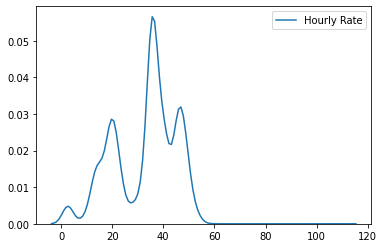

In [15]:
kdeplot(hrate_hworker)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [16]:
salary_worker = salaries["Salary or Hourly"] == "Salary"
police = salaries["Department"] == "POLICE"
police_salaries = salaries["Annual Salary"][salary_worker & police]

In [17]:
alpha = 0.95 # confidence level
df = len(police_salaries)-1 #degrees of freedom
loc = police_salaries.mean() #sample calculated in challenge 2
scale = sem(police_salaries) #standard error
t.interval(alpha, df, loc , scale)

(86177.05631531784, 86795.77269094894)

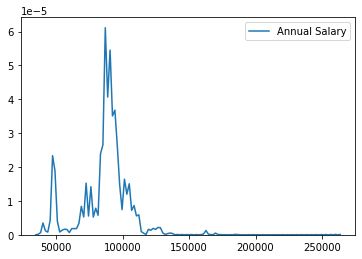

In [18]:
kdeplot(police_salaries)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [19]:
# Hourly workers in our population
hourly_worker = salaries["Salary or Hourly"] == "Hourly"

In [20]:
# Apply one sample proportion ztest
count = hourly_worker.sum() # number of successes, i.e. n. of hourly workers
nobs = salaries.shape[0] # number of observations
value = 0.25
stat, pval = proportions_ztest(count, nobs, value)

In [21]:
stat, pval

(-3.5099964213703005, 0.0004481127249057967)

### Comments
**Null Hypothesis**: The number of hourly workers in Chicago is 25%.
    
**Result**: pval < 0.05 --> The test is one sided, so the limit stays in 0.05. As pvalue is lower, we reject the null hypothesis
    
**Conclusion**:
* Number of hourly workers in Chicago is significantly different from 25% (pvalue < 0.05)
* Number of hourly workers in Chicago is less than 25% (stat < 0)